# Indian Vehicle Sales 

## Loading the Datasets

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Filter Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
vehicle_sales_data=pd.read_excel("india_vehicle_sales_yearly.xlsx")
print(f"The Shape of the Datasets is {vehicle_sales_data.shape}")
vehicle_sales_data.head()

The Shape of the Datasets is (592, 7)


,State,Year,Two Wheelers,Three Wheelers,Cars,Buses,Trucks
0,Andhra Pradesh,2010,171958,20795,151932,4272,6734
1,Andhra Pradesh,2011,187337,21850,107498,3944,9322
2,Andhra Pradesh,2012,379365,5769,214027,2933,6311
3,Andhra Pradesh,2013,153355,44188,234176,3885,7396
4,Andhra Pradesh,2014,308795,32480,176730,3058,8849


In [3]:
vehicle_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           592 non-null    object
 1   Year            592 non-null    int64 
 2   Two Wheelers    592 non-null    int64 
 3   Three Wheelers  592 non-null    int64 
 4   Cars            592 non-null    int64 
 5   Buses           592 non-null    int64 
 6   Trucks          592 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 32.5+ KB


In [4]:
df=vehicle_sales_data.groupby("Year")[["Two Wheelers","Three Wheelers","Cars","Buses","Trucks"]].sum().reset_index()
df.head()

,Year,Two Wheelers,Three Wheelers,Cars,Buses,Trucks
0,2010,10057433,920069,5343011,96867,195785
1,2011,7881722,957459,5886833,107676,217619
2,2012,9863535,1021672,6113484,97356,195706
3,2013,10400341,963716,5785641,99629,211031
4,2014,10101663,941144,5835680,111072,195336


## EDA

### Bar Plot

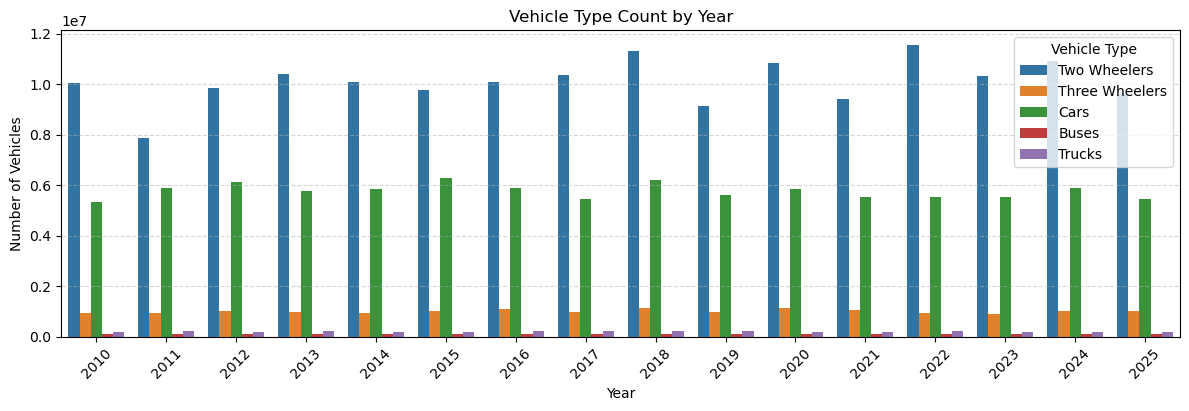

In [5]:
# Melt to long format for Seaborn
long_df = df.melt(id_vars='Year', var_name='Vehicle Type', value_name='Count')

# Plot
plt.figure(figsize=(12, 4))
sns.barplot(data=long_df, x='Year', y='Count', hue='Vehicle Type')

# Formatting
plt.title('Vehicle Type Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

### Line Plot

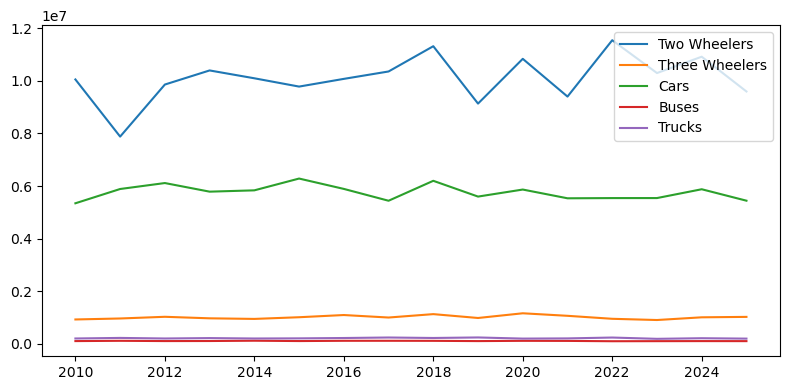

In [6]:
plt.figure(figsize=(8,4))
for i in range(1,6):
    column=df.columns[i]
    plt.plot(df['Year'],df[column],label=column)
plt.legend()
plt.tight_layout()
plt.show()

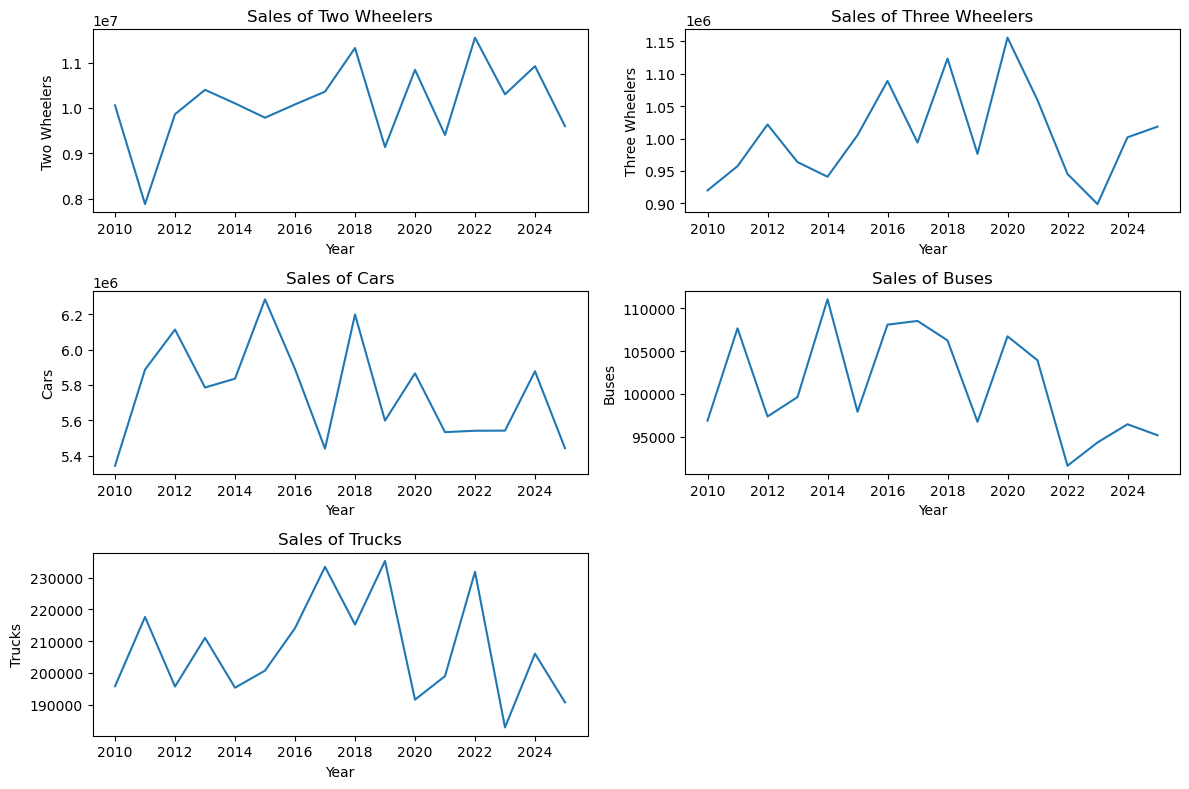

In [7]:
fig, ax = plt.subplots(3,2,figsize=(12,8))

for i in range(1,6):
    column=df.columns[i]
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax[row,col].plot(df['Year'],df[column])
    ax[row,col].set_xlabel("Year")
    ax[row,col].set_ylabel(column)
    ax[row,col].set_title(f"Sales of {column}")

fig.delaxes(ax[2,1]) 
plt.tight_layout()
plt.show()  

### Year-Over-Year Growth

In [8]:
yoy_growth = df.copy()
for col in df.columns[1:]:
    yoy_growth[col] = df[col].pct_change() * 100

yoy_growth

,Year,Two Wheelers,Three Wheelers,Cars,Buses,Trucks
0,2010,NaN,NaN,NaN,NaN,NaN
1,2011,-21.632866,4.063826,10.178194,11.158599,11.152029
2,2012,25.144416,6.706606,3.850135,-9.584308,-10.069433
3,2013,5.442329,-5.672662,-5.362621,2.334730,7.830623
4,2014,-2.871810,-2.342184,0.864883,11.485612,-7.437296
5,2015,-3.125753,6.801191,7.694682,-11.850872,2.754229
6,2016,2.996226,8.326494,-6.274364,10.414773,6.661651
7,2017,2.794629,-8.732540,-7.650630,0.403308,9.021099
8,2018,9.281694,13.024735,13.954897,-2.096884,-7.787918
9,2019,-19.289440,-13.070002,-9.687879,-8.975590,9.307091


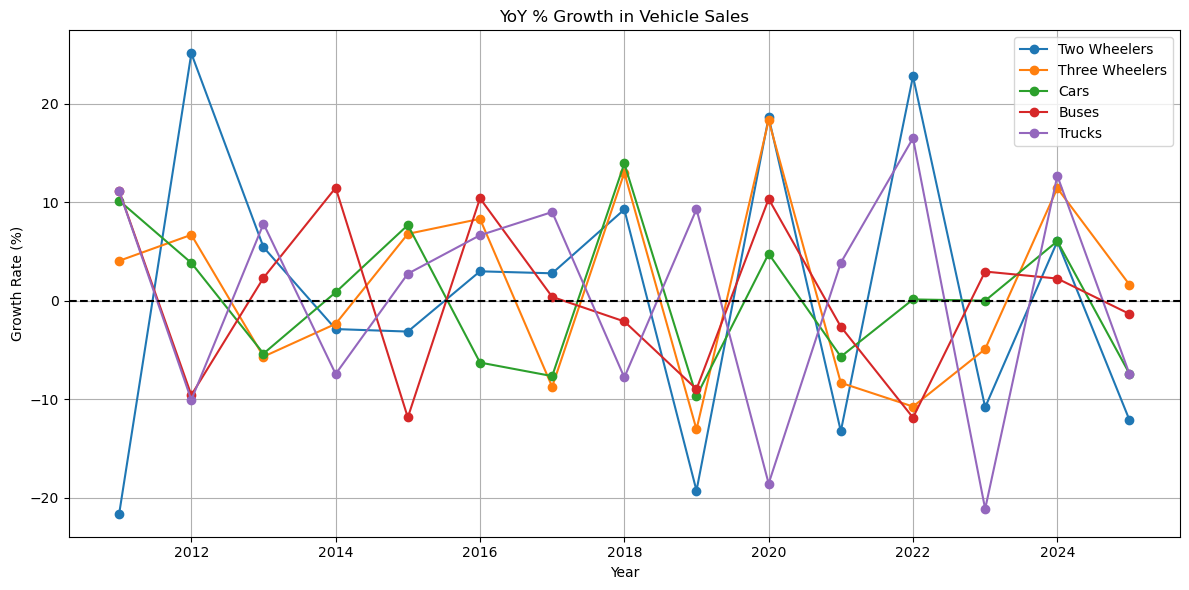

In [9]:
yoy_growth.plot(x='Year', y=df.columns[1:], figsize=(12, 6), marker='o')
plt.title('YoY % Growth in Vehicle Sales')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales Index (Base Year = 100)

In [10]:
index_df = df.copy()
for col in df.columns[1:]:
    index_df[col] = df[col] / df[col].iloc[0] * 100

index_df = index_df.round(2)
index_df

,Year,Two Wheelers,Three Wheelers,Cars,Buses,Trucks
0,2010,100.00,100.00,100.00,100.00,100.00
1,2011,78.37,104.06,110.18,111.16,111.15
2,2012,98.07,111.04,114.42,100.50,99.96
3,2013,103.41,104.74,108.28,102.85,107.79
4,2014,100.44,102.29,109.22,114.66,99.77
5,2015,97.30,109.25,117.63,101.08,102.52
6,2016,100.22,118.34,110.24,111.60,109.35
7,2017,103.02,108.01,101.81,112.05,119.21
8,2018,112.58,122.08,116.02,109.70,109.93
9,2019,90.86,106.12,104.78,99.86,120.16


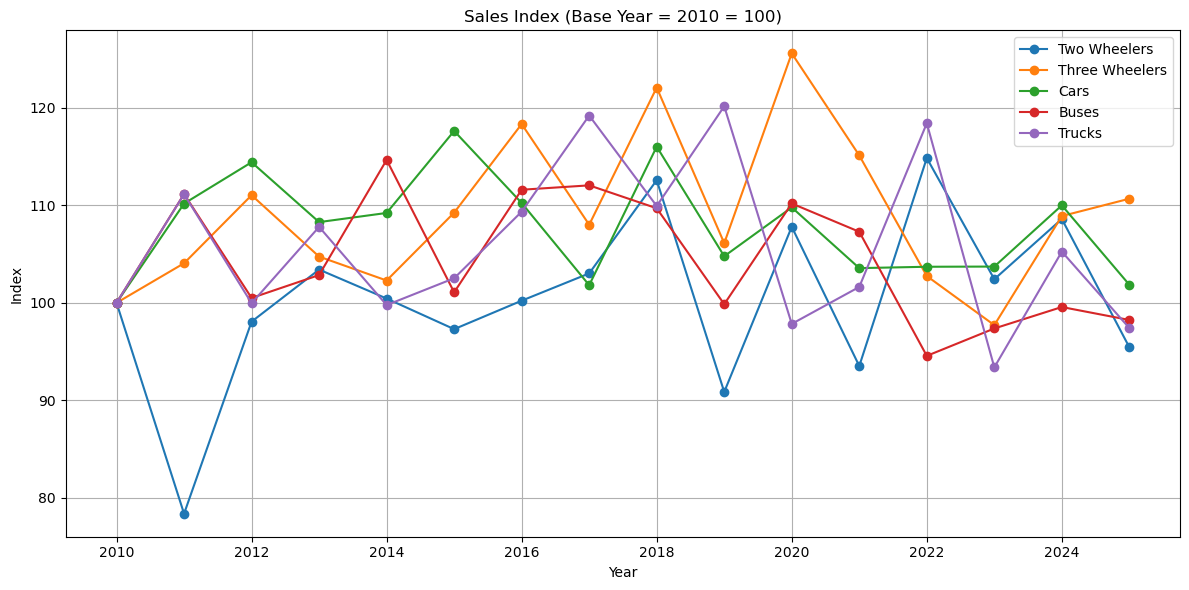

In [11]:
index_df.plot(x='Year', y=df.columns[1:], figsize=(12, 6), marker='o')
plt.title('Sales Index (Base Year = 2010 = 100)')
plt.ylabel('Index')
plt.grid(True)
plt.tight_layout()
plt.show()

### Cumulative Sales

In [12]:
cumulative_sales = df[df.columns[1:]].sum().sort_values(ascending=False)
print("Cumulative Sales (2010-2025):")
print(cumulative_sales)

Cumulative Sales (2010-2025):
Two Wheelers      161613476
Cars               92177699
Three Wheelers     16070780
Trucks              3316150
Buses               1618343
dtype: int64


## Time Series 

In [13]:
# Assuming you have this in a CSV or already defined as a DataFrame
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convert to datetime
df.set_index('Year', inplace=True)  # Set Year as index for time series
df.index = pd.date_range(start=df.index[0], end=df.index[-1], freq='AS-JAN')

In [14]:
# Store forecasts in a dictionary
forecast_dict = {}

for col in df.columns:
    try:
        model = ARIMA(df[col], order=(1, 1, 1))  # You can optimize this
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)
        forecast_dict[col] = forecast.round(2)
        print(f"{col} Forecast:\n{forecast.round(2)}\n")
    except Exception as e:
        print(f"ARIMA model failed for {col}: {e}")

Two Wheelers Forecast:
2026-01-01    10049874.08
2027-01-01     9792507.23
2028-01-01     9939487.82
2029-01-01     9855548.13
2030-01-01     9903485.56
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Three Wheelers Forecast:
2026-01-01    1065484.63
2027-01-01    1018353.86
2028-01-01    1065441.81
2029-01-01    1018396.64
2030-01-01    1065399.07
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Cars Forecast:
2026-01-01    5427807.57
2027-01-01    5413874.55
2028-01-01    5400016.55
2029-01-01    5386233.15
2030-01-01    5372523.96
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Buses Forecast:
2026-01-01    95071.47
2027-01-01    95102.61
2028-01-01    95091.78
2029-01-01    95095.55
2030-01-01    95094.24
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Trucks Forecast:
2026-01-01    191227.39
2027-01-01    191432.41
2028-01-01    191515.26
2029-01-01    191548.74
2030-01-01    191562.27
Freq: AS-JAN, Name: predicted_mean, dtype: float64



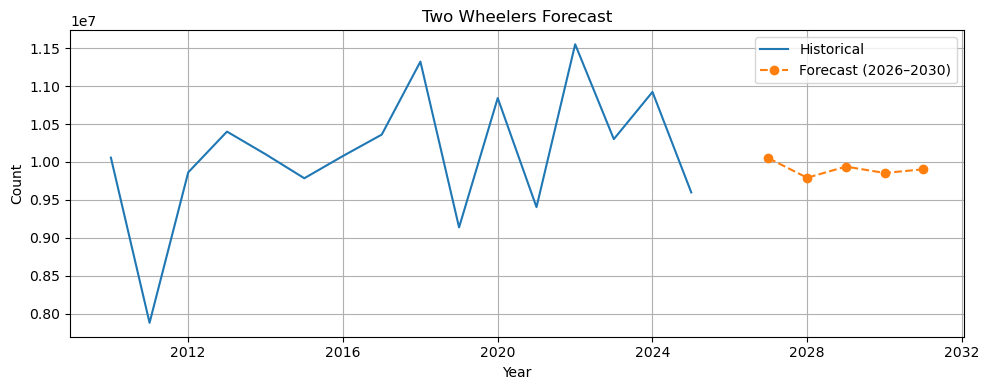

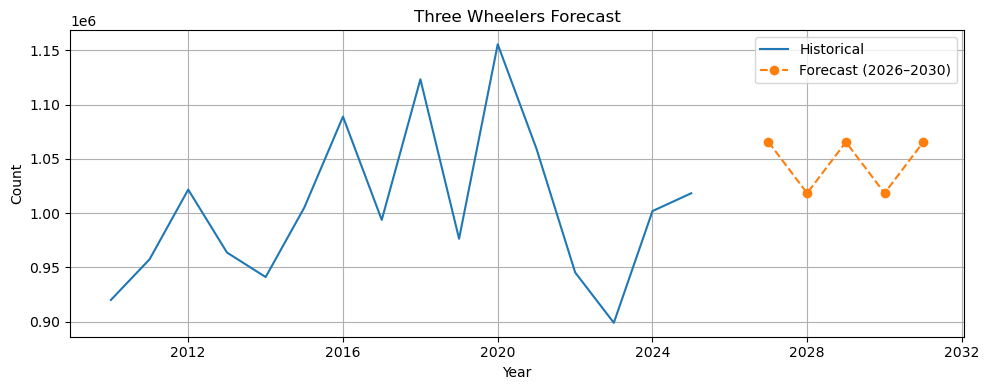

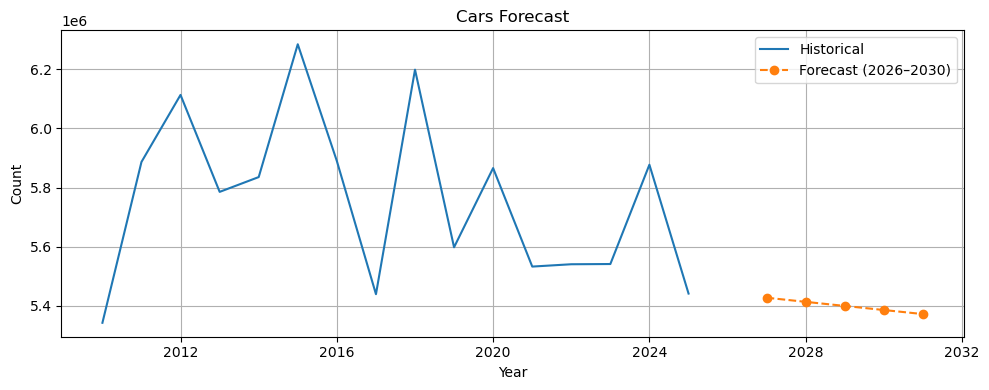

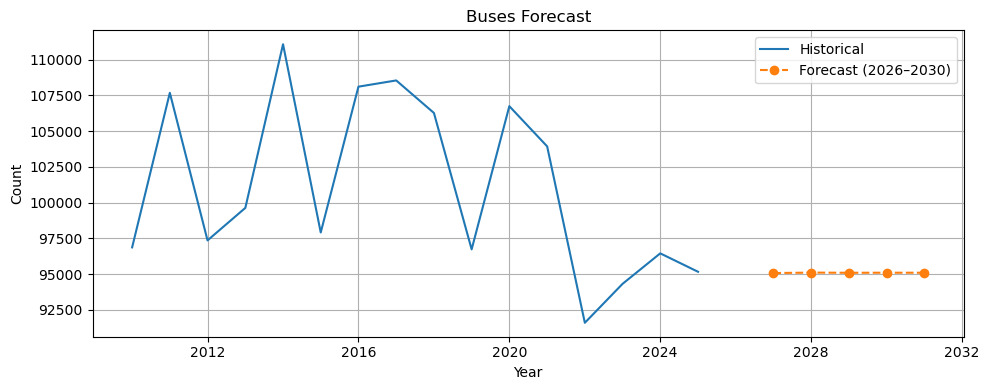

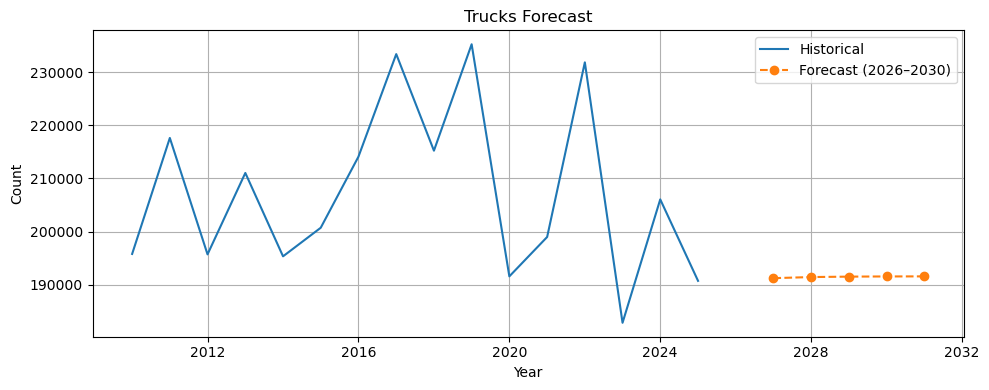

In [15]:
# Create future years for plotting
future_years = pd.date_range(start='2026', periods=5, freq='Y')

for col in df.columns:
    try:
        plt.figure(figsize=(10, 4))
        plt.plot(df.index, df[col], label='Historical')
        plt.plot(future_years, forecast_dict[col], label='Forecast (2026–2030)', linestyle='--', marker='o')
        plt.title(f'{col} Forecast')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Plotting failed for {col}: {e}")

# EV Vehicle

## Loading the Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

In [17]:
EV_data=pd.read_csv("EV_Dataset.csv")
print(f"The Shape of the dataset is {EV_data.shape}")
EV_data.head()

The Shape of the dataset is (96845, 8)


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [18]:
EV_data.nunique()

Year                   11
Month_Name             12
Date                  121
State                  34
Vehicle_Class          73
Vehicle_Category        5
Vehicle_Type           12
EV_Sales_Quantity    1447
dtype: int64

## EDA

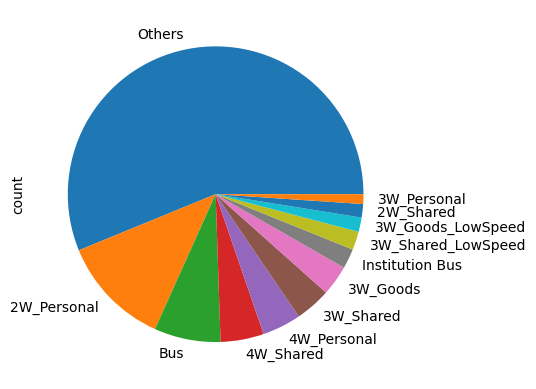

In [19]:
EV_data['Vehicle_Type'].value_counts().plot(kind = 'pie')
plt.show()

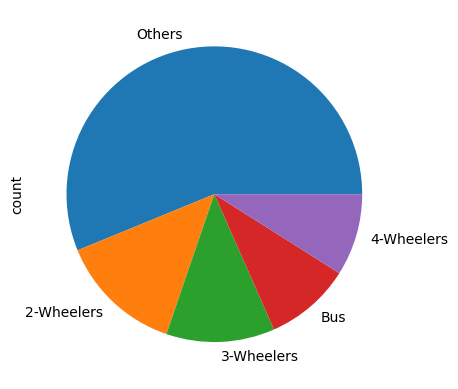

In [20]:
EV_data['Vehicle_Category'].value_counts().plot(kind = 'pie')
plt.show()

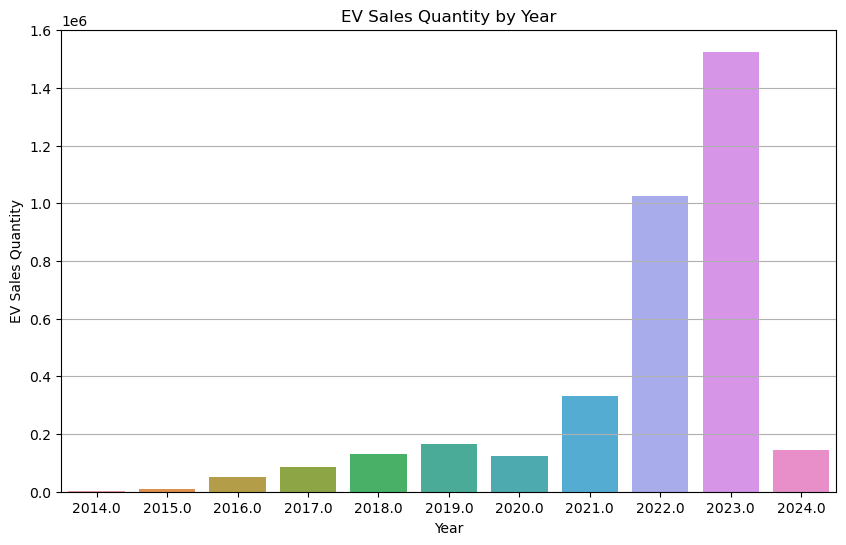

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=EV_data, x='Year', y='EV_Sales_Quantity', estimator=sum, errorbar=None)
plt.title('EV Sales Quantity by Year')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid(axis='y')
plt.show()

## Vehicle Category

In [22]:
# Group by 'Vehicle_Type' and aggregate 'Electric_Vehicle_Sales_Quantity'
cat = EV_data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()

# Handle missing values in Electric_Vehicle_Sales_Quantity if any
imputer = SimpleImputer(strategy='mean')
cat['EV_Sales_Quantity'] = imputer.fit_transform(cat[['EV_Sales_Quantity']])

# Feature scaling: Normalize EV sales quantity (and other features if available)
scaler = StandardScaler()
cat['EV_Sales_Quantity_Scaled'] = scaler.fit_transform(cat[['EV_Sales_Quantity']])

# Determine optimal number of clusters using the elbow method
values = []
cluster_options = range(1, 6)

for num_clusters in cluster_options:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
    kmeans.fit(cat[['EV_Sales_Quantity_Scaled']])
    values.append(kmeans.inertia_)

cat

,Vehicle_Category,EV_Sales_Quantity,EV_Sales_Quantity_Scaled
0,2-Wheelers,1808105.0,1.334012
1,3-Wheelers,1620310.0,1.104038
2,4-Wheelers,149775.0,-0.696783
3,Bus,7009.0,-0.871615
4,Others,8612.0,-0.869652


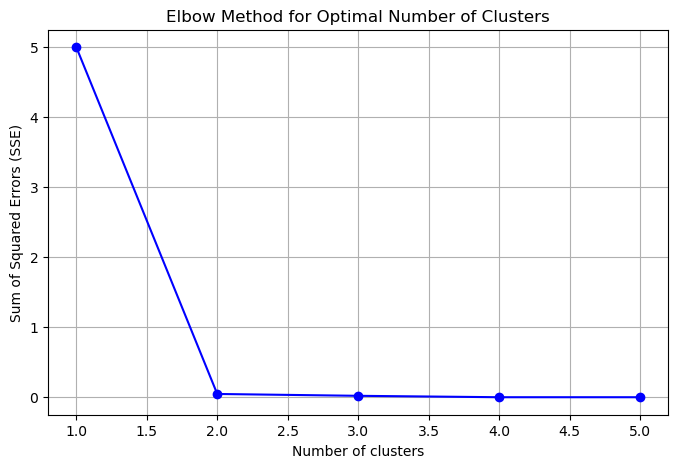

In [23]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_options, values, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [24]:
# Choose the optimal number of clusters (e.g., where the elbow occurs, say 2)
optimal_cluster = 2

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_cluster, init='k-means++', random_state=0)
cat['cluster'] = kmeans.fit_predict(cat[['EV_Sales_Quantity_Scaled']])

# Evaluate the quality of clusters using silhouette score
silhouette_avg_score = silhouette_score(cat[['EV_Sales_Quantity_Scaled']], cat['cluster'])
print(f'Silhouette Score for {optimal_cluster} clusters: {silhouette_avg_score}')

# Display cluster assignments
print("Cluster Labels for Vehicle Type:\n", cat['cluster'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

# Analyze cluster segments
cluster_mean_sales = cat.groupby('cluster')['EV_Sales_Quantity'].mean().reset_index()
print(cluster_mean_sales)

Silhouette Score for 2 clusters: 0.9196015380192561
Cluster Labels for Vehicle Type:
 cluster
0    3
1    2
Name: count, dtype: int64
Inertia: 0.04659523185038698
Iterations: 2
   cluster  EV_Sales_Quantity
0        0            55132.0
1        1          1714207.5


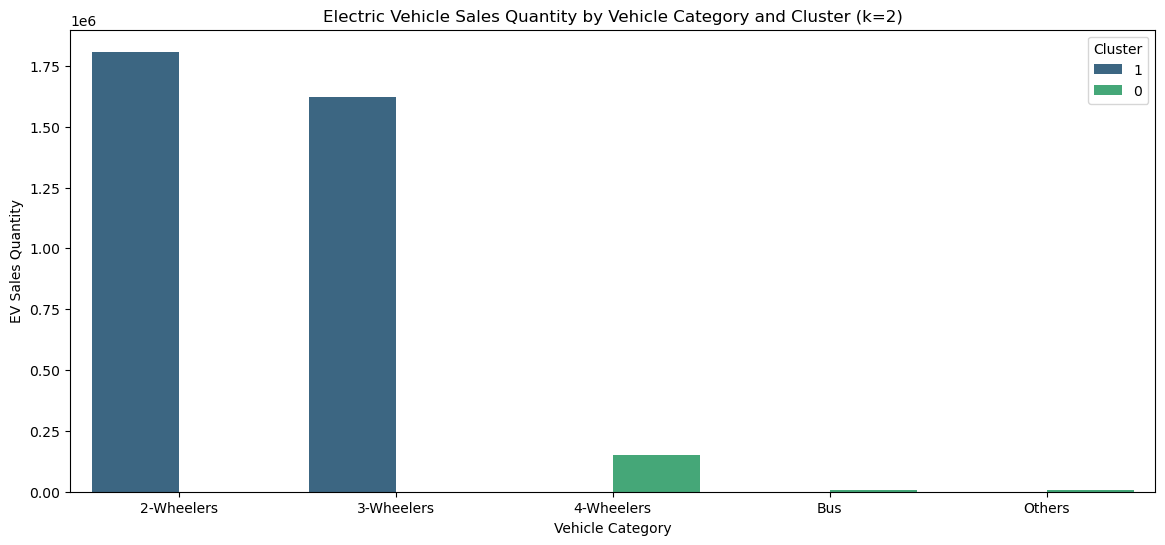

In [25]:
# Plot the clustered states by EV sales quantity
plt.figure(figsize=(14, 6))
cat['cluster'] = cat['cluster'].astype(str)
sns.barplot(data=cat, x='Vehicle_Category', y='EV_Sales_Quantity', hue='cluster', palette='viridis')
plt.title(f'Electric Vehicle Sales Quantity by Vehicle Category and Cluster (k={optimal_cluster})')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()

## Vehicle Type

In [26]:
# Group by 'Vehicle_Type' and aggregate 'Electric_Vehicle_Sales_Quantity'
type = EV_data.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index()

# Handle missing values in Electric_Vehicle_Sales_Quantity if any
imputer = SimpleImputer(strategy='mean')
type['EV_Sales_Quantity'] = imputer.fit_transform(type[['EV_Sales_Quantity']])

# Feature scaling: Normalize EV sales quantity (and other features if available)
scaler = StandardScaler()
type['EV_Sales_Quantity_Scaled'] = scaler.fit_transform(type[['EV_Sales_Quantity']])

# Determine optimal number of clusters using the elbow method
values = []
cluster_options = range(1, 11)

for num_clusters in cluster_options:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
    kmeans.fit(type[['EV_Sales_Quantity_Scaled']])
    values.append(kmeans.inertia_)

type

,Vehicle_Type,EV_Sales_Quantity,EV_Sales_Quantity_Scaled
0,2W_Personal,1796340.0,2.540114
1,2W_Shared,11765.0,-0.488250
2,3W_Goods,44974.0,-0.431895
3,3W_Goods_LowSpeed,90656.0,-0.354374
4,3W_Personal,421.0,-0.507500
5,3W_Shared,76132.0,-0.379021
6,3W_Shared_LowSpeed,1408127.0,1.881329
7,4W_Personal,130676.0,-0.286462
8,4W_Shared,19099.0,-0.475804
9,Bus,7009.0,-0.496321


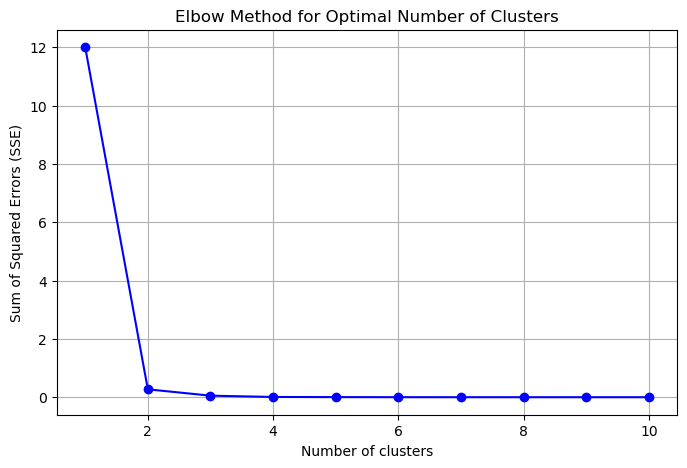

In [27]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_options, values, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [28]:
# Choose the optimal number of clusters (e.g., where the elbow occurs, say 3)
optimal_cluster = 2

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_cluster, init='k-means++', random_state=0)
type['cluster'] = kmeans.fit_predict(type[['EV_Sales_Quantity_Scaled']])

# Evaluate the quality of clusters using silhouette score
silhouette_avg_score = silhouette_score(type[['EV_Sales_Quantity_Scaled']], type['cluster'])
print(f'Silhouette Score for {optimal_cluster} clusters: {silhouette_avg_score}')

# Display cluster assignments
print("Cluster Labels for Vehicle Type:\n", type['cluster'].value_counts())
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

# Analyze cluster segments
cluster_mean_sales = type.groupby('cluster')['EV_Sales_Quantity'].mean().reset_index()
print(cluster_mean_sales)

Silhouette Score for 2 clusters: 0.9307831815651202
Cluster Labels for Vehicle Type:
 cluster
0    10
1     2
Name: count, dtype: int64
Inertia: 0.27050670217458933
Iterations: 2
   cluster  EV_Sales_Quantity
0        0            38934.4
1        1          1602233.5


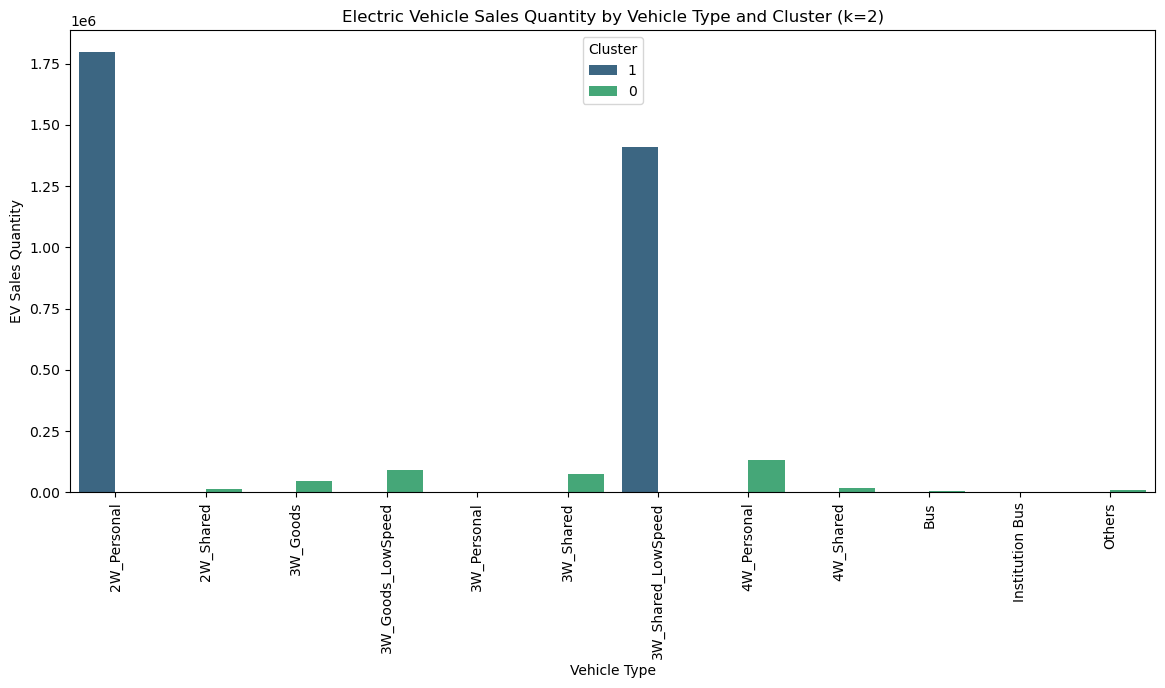

In [29]:
# Plot the clustered states by EV sales quantity
plt.figure(figsize=(14, 6))
type['cluster'] = type['cluster'].astype(str)
sns.barplot(data=type, x='Vehicle_Type', y='EV_Sales_Quantity', hue='cluster', palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Electric Vehicle Sales Quantity by Vehicle Type and Cluster (k={optimal_cluster})')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Cluster')
plt.show()